In [1]:
import numpy as np
import pandas as pd
import math
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set(style="darkgrid")


In [2]:
warnings.filterwarnings('ignore')

ID #1: 302673355

ID #2: 207380528


In [3]:
df = pd.read_csv('AMI_GSE66360_series_matrix.csv', encoding='ISO-8859-1', skiprows=59)

df.head()

,Class,H,H.1,H.2,H.3,H.4,H.5,H.6,H.7,H.8,...,M.39,M.40,M.41,M.42,M.43,M.44,M.45,M.46,M.47,M.48
0,ID_REF,GSM1620819,GSM1620820,GSM1620821,GSM1620822,GSM1620823,GSM1620824,GSM1620825,GSM1620826,GSM1620827,...,GSM1620908,GSM1620909,GSM1620910,GSM1620911,GSM1620912,GSM1620913,GSM1620914,GSM1620915,GSM1620916,GSM1620917
1,1007_s_at,5.866377893,4.948736331,5.148384393,5.064418945,5.017832878,5.116153518,5.431328058,5.235270857,5.773528455,...,5.419481538,5.057716465,5.996493392,5.343132759,5.558892254,6.472517225,5.678815851,5.653286378,6.013841046,5.465333944
2,1053_at,8.22579012,7.525865369,7.764636529,7.198461482,7.831450258,7.203591859,7.694550756,7.760259212,8.279814404,...,7.226347747,7.105537863,5.354105386,8.271499725,5.96334574,8.261421952,6.925752665,7.918424183,7.442701377,9.225221352
3,117_at,6.17973231,6.628137025,5.859151477,5.974135101,6.793079158,6.43522914,6.320546126,6.48359047,6.387779205,...,6.789500767,7.441939912,7.026928573,6.003972814,7.474325713,6.367759272,6.835755831,7.577034915,7.147417202,6.48112813
4,121_at,6.179477974,6.58288903,6.602134766,6.545904723,5.911542321,6.28542026,6.562315839,6.345887555,6.27280582,...,6.513436777,6.317522639,7.413453376,6.809103167,5.949091368,6.440978114,6.955883278,6.499215058,6.587065112,6.897590966


In [4]:
df = df.T
df.columns = df.iloc[0]
df.drop('Class', inplace=True)
df['class'] = df.index
df['class'] = df['class'].apply(lambda x: x[0])
df.set_index('ID_REF', inplace=True)

In [5]:
def convert_to_numeric(col):
    try:
        return pd.to_numeric(col)
    except:
        return col
    
df = df.apply(convert_to_numeric)
df

Class,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,class
ID_REF,,,,,,,,,,,,,,,,,,,,,
GSM1620819,5.866378,8.225790,6.179732,6.179478,2.792048,9.290411,6.998285,5.348944,10.742427,7.270561,...,13.266235,14.571230,14.276568,4.504659,3.139334,2.747015,2.651554,3.413429,3.140612,H
GSM1620820,4.948736,7.525865,6.628137,6.582889,2.695714,9.462275,6.558215,5.410884,9.865655,4.810195,...,13.517013,14.738834,14.341233,4.409226,3.039961,2.638606,2.643615,3.399063,3.132691,H
GSM1620821,5.148384,7.764637,5.859151,6.602135,2.580181,9.116776,6.851623,5.254073,10.148454,7.822844,...,13.416583,14.627181,14.318568,4.310076,3.220109,2.495261,2.626028,3.539970,3.698396,H
GSM1620822,5.064419,7.198461,5.974135,6.545905,2.712124,9.134584,7.357827,5.242140,10.879913,5.690417,...,13.494827,14.754124,14.363297,4.439311,3.263782,2.544199,2.504958,3.396225,3.638612,H
GSM1620823,5.017833,7.831450,6.793079,5.911542,2.723687,9.582344,7.283873,5.219484,10.090525,7.089369,...,13.330192,14.548389,14.263677,4.562883,3.138524,2.506630,2.609707,3.434720,3.577649,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1620913,6.472517,8.261422,6.367759,6.440978,3.730139,7.355730,6.206879,6.217930,5.375997,6.133232,...,5.942308,7.290514,8.988511,5.567947,5.558780,5.429437,4.487940,4.254286,5.375811,M
GSM1620914,5.678816,6.925753,6.835756,6.955883,2.914868,7.944295,6.638364,5.992344,9.613539,3.896807,...,14.163706,14.884506,14.792506,4.902195,3.416999,2.834741,2.782356,3.882080,3.744138,M
GSM1620915,5.653286,7.918424,7.577035,6.499215,3.013901,8.563123,7.379568,5.766029,9.312494,5.545194,...,13.682425,14.884506,14.783801,5.239906,3.699181,3.249683,3.056727,3.649827,4.021536,M



### a. High level description of the data and some pre-processing

1) How many genes profiled?

In [6]:
num_genes = df.shape[1] - 1
print(f'There were {num_genes} genes profiled.')

There were 54675 genes profiled.


2) How many samples (subjects/patients) in total?

In [7]:
num_samples = df.shape[0]
print(f'There were {num_samples} subjects in the study.')

There were 99 subjects in the study.


3) How many samples in each class?

In [8]:
num_of_class_h = len(df[df['class'] == 'H'])
print(f'There were {num_of_class_h} healthy samples (class = H). The rest ({num_samples - num_of_class_h}) have Myocardial Infraction.')

There were 50 healthy samples (class = H). The rest (49) have Myocardial Infraction.


4) If there are missing values, then remove the entire row (gene) from the data matrix. How many rows left now?

In [9]:
df.dropna(axis=1, inplace=True)
print(f"There were {num_genes-df.shape[1] -1} genes with missing values. After dropping, we're left with {df.shape[1] -1} genes.")
num_genes = df.shape[1] -1

There were 45 genes with missing values. After dropping, we're left with 54628 genes.


5) Pick 20 genes at random. Draw 20 pair boxplots in one figure comparing expression levels of each of these genes in the two classes M and H.

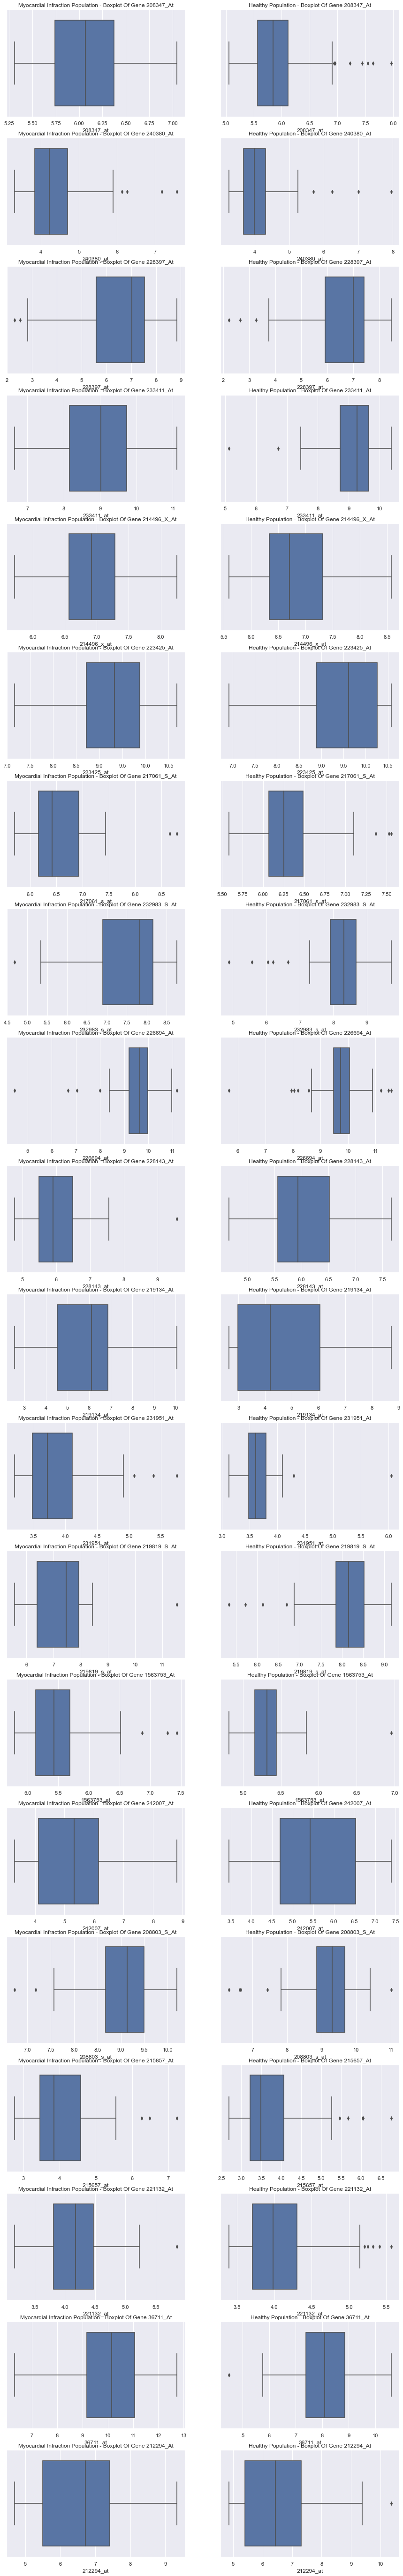

In [10]:
df_h = df[df['class'] == 'H']
df_m = df[df['class'] == 'M']
NUM_GENES = 20

random_genes = np.random.choice(df.columns, NUM_GENES, replace=False)

fig, axs = plt.subplots(NUM_GENES, 2, figsize=(15, 5 * NUM_GENES))
for axis_index, gene in enumerate(random_genes):
    ax0 = sns.boxplot(df_m[gene], ax=axs[axis_index, 0])
    ax1 = sns.boxplot(df_h[gene], ax=axs[axis_index, 1])

    ax0.set_title(f'myocardial infraction population - boxplot of gene {gene}'.title())
    ax1.set_title(f'healthy population - boxplot of gene {gene}'.title())

    print("\n")

plt.show()


### WRS for differential expression(DE)

1) Consider some gene, g. Under the null model (which assumes that for g there is no M vs H DE), what is the expected sum of ranks of g’s expression levels measured for samples labeled M?

In [11]:
n = len(df)
b = len(df[df['class'] == 'M'])
mu = b * ((n + 1) / 2)
print(f"The expected rank sum is {int(mu)}")

The expected rank sum is 2450


2) Denote this sum of ranks by RS(g). What is the maximal value, c, that RS(g) can take?

In [12]:
c = sum([i for i in range(n - b + 1, n + 1)])
print(f"The maximal value will be achieved if all of the top ranks would be from the M population. In this case {c}")

The maximal value will be achieved if all of the top ranks would be from the M population. In this case 3675


3) Under the null model, what is the probability of RS(g) = c? (Provide a formula for this and explain it)

In [13]:
num_combs = math.comb(n, b)
p_c = 1 / num_combs
print(f"There is only one combination in which the the rank sum equals the maximal rank sum, hence the probability is 1/all possible combinations: {p_c:.3}")

There is only one combination in which the the rank sum equals the maximal rank sum, hence the probability is 1/all possible combinations: 1.98e-29


4) Under the null model,what is the probability of RS(g)=c-1? what is the probability of RS(g) = c-2?
(Provide formulas and explain them)


To calculate $RS(g) = c-1$, we'll examine the number of different combinations that result in $c-1$. We can see that there is, again, only one combination here - M will occupy rank 50 and all of ranks from 52 to 99. Meaning, the probability will be the same as the probability for $RS(g) = c$.

We'll do the same for $RS(g) = c-2$ and find two different option: if M will occupy the 49th spot and ranks 52-99, we'll reach that conclusion. Also, M can occupy ranks 53-99 and the 50th and 51st spot. Meaning, the probaility is:

In [14]:
print(f"{2/num_combs:.3}")

3.96e-29


5) Draw a histogram of the values of RS(g) in the dataset. Here g ranges over all genes in the data (after the clean-up). Compute the IQR for this distribution and present it on the plot with the histogram.

In [15]:
genes_cols = list(df.columns)[:-1]
rss = [df[col].rank()[df['class'] == 'M'].sum() for col in genes_cols]
iqr = st.iqr(rss)
iqr

329.0

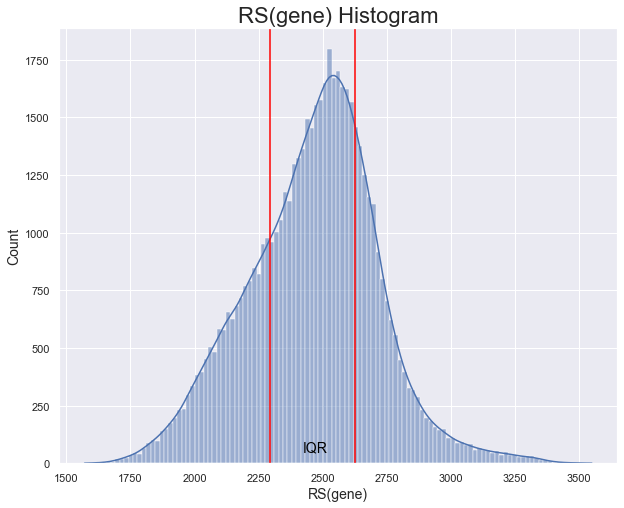

In [16]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.histplot(rss, kde=True)

ax.annotate("IQR", xy=(2420, 50), color='black', fontsize=14)

ax.axvline(x=np.percentile(rss, 25), color='red')
ax.axvline(x=np.percentile(rss, 75), color='red')

plt.ylabel("Count", fontsize=14)
plt.xlabel("RS(gene)", fontsize=14)
plt.title("RS(gene) Histogram", fontsize=22)

plt.show()

### c. DifferentialExpression
The purpose is to determine the statistical significance of differential expression (DE) observed for each gene in H vs M. Evaluate the DE in both one-sided directions for every gene, using both Student t-test and WRS test.
Report the number of genes overexpressed in M vs H (M > H) at a p-value better (≤) than 0.07 and separately genes underexpressed in M vs H (M < H) at a p-value better than 0.07. For both directions use both a Student t-test and a WRS test.

In [17]:
# WRS Test

wrs_p_vals_m_over_h = [(gene_col, st.ranksums(df[gene_col][df['class'] == 'M'], df[gene_col][df['class'] == 'H'], alternative='greater')[1]) for gene_col in genes_cols]
wrs_p_vals_m_over_h_sig = [gene for gene in wrs_p_vals_m_over_h if gene[1] <= 0.07]
print(f"Under WRS test, there are {len(wrs_p_vals_m_over_h_sig)} genes in which M > H at a p-value better than 0.07")

wrs_p_vals_h_over_m = [(gene_col, st.ranksums(df[gene_col][df['class'] == 'H'], df[gene_col][df['class'] == 'M'], alternative='greater')[1]) for gene_col in genes_cols]
wrs_p_vals_h_over_m_sig = [gene for gene in wrs_p_vals_h_over_m if gene[1] <= 0.07]
print(f"Under WRS test, there are {len(wrs_p_vals_h_over_m_sig)} genes in which M < H at a p-value better than 0.07")


Under WRS test, there are 10787 genes in which M > H at a p-value better than 0.07
Under WRS test, there are 10667 genes in which M < H at a p-value better than 0.07


In [18]:
# Student T-Test

t_p_vals_m_over_h = [(gene_col, st.ttest_ind(df[gene_col][df['class'] == 'M'], df[gene_col][df['class'] == 'H'], alternative='greater')[1]) for gene_col in genes_cols]
t_p_vals_m_over_h_sig = [gene for gene in t_p_vals_m_over_h if gene[1] <= 0.07]
print(f"Under t test, there are {len(t_p_vals_m_over_h_sig)} genes in which M < H at a p-value better than 0.07")

t_p_vals_h_over_m = [(gene_col, st.ttest_ind(df[gene_col][df['class'] == 'H'], df[gene_col][df['class'] == 'M'], alternative='greater')[1]) for gene_col in genes_cols]
t_p_vals_h_over_m_sig = [gene for gene in t_p_vals_h_over_m if gene[1] <= 0.07]
print(f"Under t test, there are {len(t_p_vals_h_over_m_sig)} genes in which M > H at a p-value better than 0.07")


Under t test, there are 8517 genes in which M < H at a p-value better than 0.07
Under t test, there are 8639 genes in which M > H at a p-value better than 0.07


### D. Correlations

Select the 80 most significant genes from each one of the one- sided WRS DE lists you computed in 3c. Generate a set of 160 genes, D, which is the union of the above two sets.

In [19]:
wrs_m_over_h_subset = pd.DataFrame(wrs_p_vals_m_over_h, columns=["gene", "p_value"]).sort_values(by="p_value").iloc[:80]
wrs_m_over_h_subset["expressed"] = "over"

wrs_h_over_m_subset = pd.DataFrame(wrs_p_vals_h_over_m, columns=["gene", "p_value"]).sort_values(by="p_value").iloc[:80]
wrs_h_over_m_subset["expressed"] = "under"

D = wrs_m_over_h_subset.append(wrs_h_over_m_subset)
D

,gene,p_value,expressed
18255,208869_s_at,7.276809e-15,over
25504,216248_s_at,9.053458e-15,over
14046,204622_x_at,1.002448e-13,over
53257,244054_at,2.423984e-13,over
13312,203887_s_at,2.686869e-13,over
...,...,...,...
44981,235779_at,2.757695e-07,under
52076,242874_at,2.808256e-07,under
8047,1565882_at,2.912071e-07,under
34090,224879_at,3.019582e-07,under


All cols in D are the columns we want the kendal corr for. So we'llcreate a new df, with just those cols, and calculate the kendall corr there.

In [20]:
kendell_df = df[D.gene]

kendell_df.head()

Class,208869_s_at,216248_s_at,204622_x_at,244054_at,203887_s_at,203888_at,217202_s_at,203574_at,241279_at,240103_at,...,223588_at,221081_s_at,235310_at,230428_at,222108_at,235779_at,242874_at,1565882_at,224879_at,227626_at
ID_REF,,,,,,,,,,,,,,,,,,,,,
GSM1620819,8.070220,5.802974,6.896882,6.711893,6.038182,5.780497,6.781219,9.023625,6.667995,7.770745,...,6.203788,10.616645,6.590359,8.718653,8.120315,7.822442,9.455573,6.969992,9.591532,8.858780
GSM1620820,7.779279,5.969281,11.701536,7.239616,6.171686,6.134241,6.837768,8.169069,6.362268,5.389721,...,4.853874,10.868348,7.161141,8.621958,7.762667,6.992076,9.317101,7.494097,9.683986,9.237849
GSM1620821,8.901285,9.161624,10.016036,6.505777,4.150094,3.371993,6.396831,8.446429,6.709201,5.493529,...,3.736956,10.073093,6.133729,7.956835,7.790073,7.651365,8.738829,6.576974,9.383290,8.441349
GSM1620822,7.808380,4.771720,6.018702,5.591840,5.385700,5.648239,6.400286,6.936367,5.686112,6.286257,...,5.306395,10.780436,6.893969,9.110403,8.374069,8.991112,9.554941,6.771564,9.847400,8.920919
GSM1620823,8.170853,5.938545,6.692284,6.686149,5.703590,5.734383,6.709851,8.012119,6.543745,6.528912,...,5.007132,10.762445,7.129899,7.974059,8.219504,7.821126,9.589432,6.657010,9.731894,8.906963


As expected, 160 columns(genes)

In [21]:
corr = kendell_df.corr(method="kendall")
corr

Class,208869_s_at,216248_s_at,204622_x_at,244054_at,203887_s_at,203888_at,217202_s_at,203574_at,241279_at,240103_at,...,223588_at,221081_s_at,235310_at,230428_at,222108_at,235779_at,242874_at,1565882_at,224879_at,227626_at
Class,,,,,,,,,,,,,,,,,,,,,
208869_s_at,1.000000,0.664399,0.617811,0.433519,0.419913,0.408369,0.475984,0.584003,0.489177,0.457019,...,-0.345702,-0.217069,-0.285920,-0.255824,-0.234385,-0.281856,-0.346526,-0.377036,-0.216656,-0.323026
216248_s_at,0.664399,1.000000,0.851165,0.448361,0.386106,0.386931,0.466089,0.555968,0.484230,0.450423,...,-0.415791,-0.326737,-0.335395,-0.289631,-0.268192,-0.349485,-0.416615,-0.401773,-0.238095,-0.417852
204622_x_at,0.617811,0.851165,1.000000,0.457019,0.373325,0.392290,0.442589,0.554731,0.450010,0.400536,...,-0.400536,-0.319728,-0.324263,-0.280148,-0.267780,-0.354845,-0.411255,-0.404659,-0.261596,-0.400124
244054_at,0.433519,0.448361,0.457019,1.000000,0.522160,0.531231,0.534529,0.562564,0.460317,0.576582,...,-0.226139,-0.281385,-0.244692,-0.297877,-0.313544,-0.308247,-0.337456,-0.261596,-0.327974,-0.340342
203887_s_at,0.419913,0.386106,0.373325,0.522160,1.000000,0.783137,0.495362,0.476397,0.468975,0.466502,...,-0.178726,-0.263657,-0.204700,-0.244692,-0.233972,-0.219588,-0.307359,-0.211709,-0.229437,-0.232736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235779_at,-0.281856,-0.349485,-0.354845,-0.308247,-0.219588,-0.260000,-0.194021,-0.171753,-0.151134,-0.245155,...,0.359794,0.437732,0.411340,0.341237,0.371340,1.000000,0.234021,0.259175,0.275670,0.459175
242874_at,-0.346526,-0.416615,-0.411255,-0.337456,-0.307359,-0.282622,-0.274376,-0.302412,-0.292517,-0.304886,...,0.197691,0.287570,0.137085,0.266131,0.195217,0.234021,1.000000,0.419501,0.252525,0.319316
1565882_at,-0.377036,-0.401773,-0.404659,-0.261596,-0.211709,-0.195217,-0.255411,-0.315605,-0.305710,-0.231499,...,0.320552,0.226551,0.322614,0.283447,0.217481,0.259175,0.419501,1.000000,0.151927,0.385281


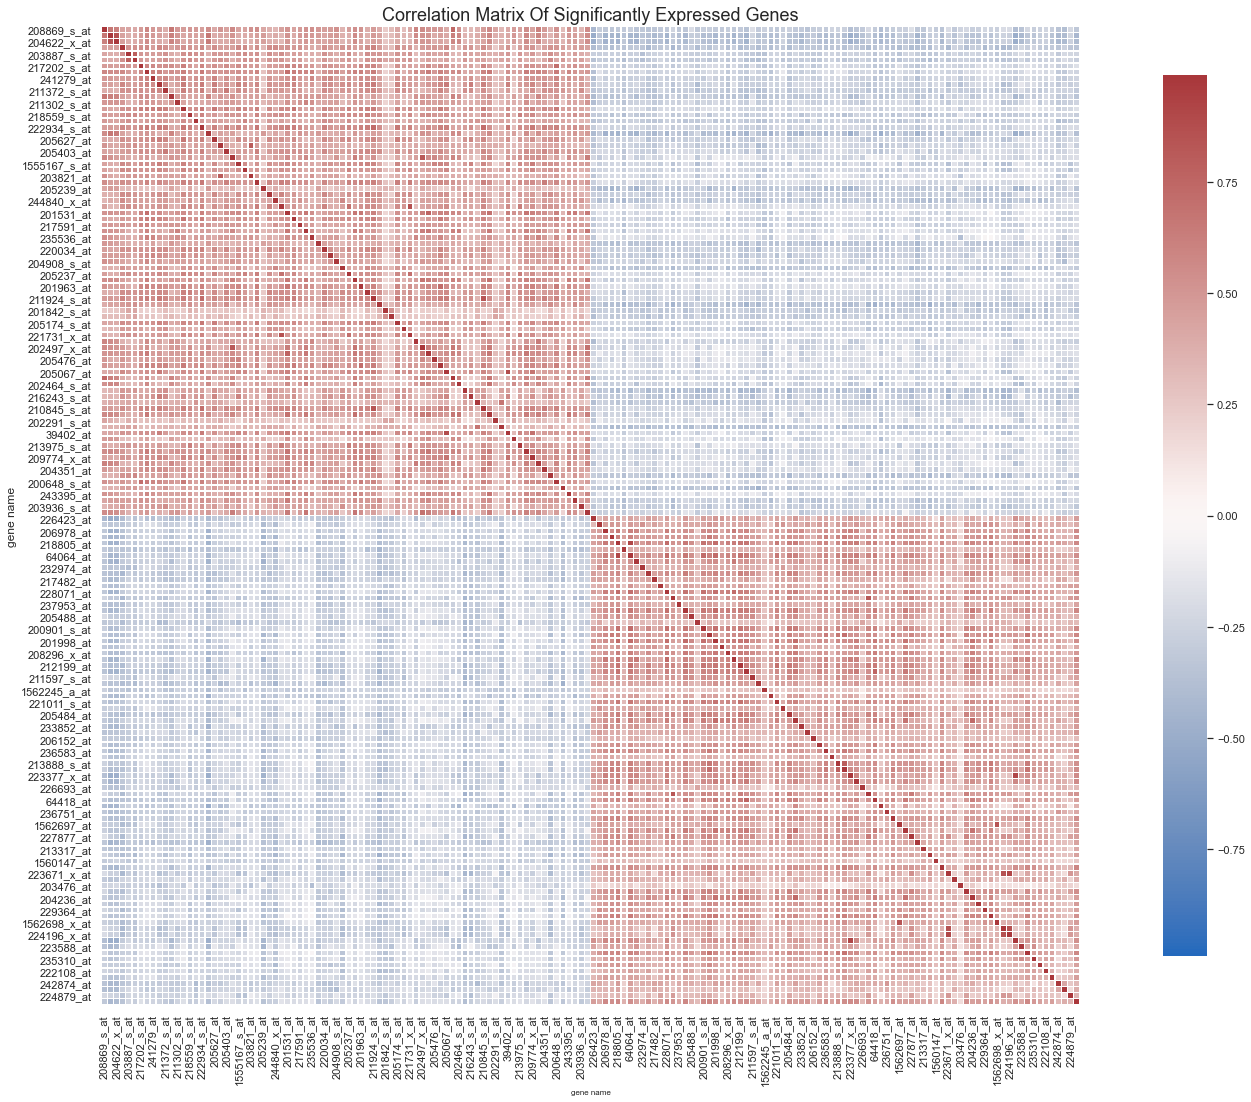

In [22]:
sns.set(style="white")

f, ax = plt.subplots(figsize=(30, 18))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap="vlag", vmax=.99, vmin=-0.99, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .9})

plt.title("Correlation Matrix of significantly expressed genes".title(), fontsize=18)

plt.xlabel('gene name', fontsize=8)
plt.ylabel('gene name', fontsize=12)
plt.show()

2) Under a NULL model that assumes that genes are pairwise independent, what is the expected value for 𝜏?


Under the Null model, the random variables are pairwise independent. Pairwise independent random variables with finite variance are uncorrelated --> $ E(\tau) =  0$.

3) Now compute the Kendall $\tau$ correlations in all 80 choose 2 pairs from the overexpressed genes in D. Present your results on a histogram. What is the average value you observed? Compare it to the value in the above section. Explain.


First, we'll filter only the over-expressed genes, 80 columns(genes)

In [23]:
over_expressed_kendell_df = df[D[D.expressed == "over"].gene]
over_expressed_kendell_df.shape

(99, 80)

In [24]:
over_expressed_corr = over_expressed_kendell_df.corr(method="kendall")
over_expressed_corr

Class,208869_s_at,216248_s_at,204622_x_at,244054_at,203887_s_at,203888_at,217202_s_at,203574_at,241279_at,240103_at,...,209774_x_at,232213_at,204351_at,235568_at,200648_s_at,228648_at,243395_at,211628_x_at,203936_s_at,218319_at
Class,,,,,,,,,,,,,,,,,,,,,
208869_s_at,1.000000,0.664399,0.617811,0.433519,0.419913,0.408369,0.475984,0.584003,0.489177,0.457019,...,0.435993,0.607091,0.486704,0.360544,0.525046,0.313544,0.513915,0.423624,0.337868,0.552257
216248_s_at,0.664399,1.000000,0.851165,0.448361,0.386106,0.386931,0.466089,0.555968,0.484230,0.450423,...,0.414554,0.587302,0.434756,0.348176,0.466502,0.360544,0.494949,0.463203,0.394764,0.553906
204622_x_at,0.617811,0.851165,1.000000,0.457019,0.373325,0.392290,0.442589,0.554731,0.450010,0.400536,...,0.379509,0.550608,0.380746,0.371676,0.446300,0.355184,0.451659,0.465265,0.391053,0.534529
244054_at,0.433519,0.448361,0.457019,1.000000,0.522160,0.531231,0.534529,0.562564,0.460317,0.576582,...,0.506906,0.353948,0.447124,0.510616,0.496186,0.452896,0.401773,0.455782,0.476397,0.441765
203887_s_at,0.419913,0.386106,0.373325,0.522160,1.000000,0.783137,0.495362,0.476397,0.468975,0.466502,...,0.490827,0.337044,0.439291,0.530818,0.447949,0.459905,0.362606,0.457844,0.387755,0.361369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228648_at,0.313544,0.360544,0.355184,0.452896,0.459905,0.480519,0.406308,0.405483,0.428571,0.403834,...,0.365492,0.238920,0.380746,0.476397,0.353948,1.000000,0.264482,0.374562,0.450423,0.195630
243395_at,0.513915,0.494949,0.451659,0.401773,0.362606,0.341991,0.482169,0.576170,0.511853,0.464028,...,0.494949,0.570398,0.512678,0.311482,0.528757,0.264482,1.000000,0.474335,0.382808,0.571635
211628_x_at,0.423624,0.463203,0.465265,0.455782,0.457844,0.442177,0.522985,0.513090,0.463616,0.381159,...,0.550608,0.446300,0.445475,0.494949,0.496186,0.374562,0.474335,1.000000,0.421975,0.512678


In [25]:
over_expressed_corr_values = []
cols = list(over_expressed_corr.columns)

for i, (index, row) in enumerate(start=0, iterable=over_expressed_corr.iterrows()):
    over_expressed_corr_values.extend(row[i + 1: ])  # for each row, append all values to the right of the correlation with itself

len(over_expressed_corr_values) == math.comb(80,2)

True

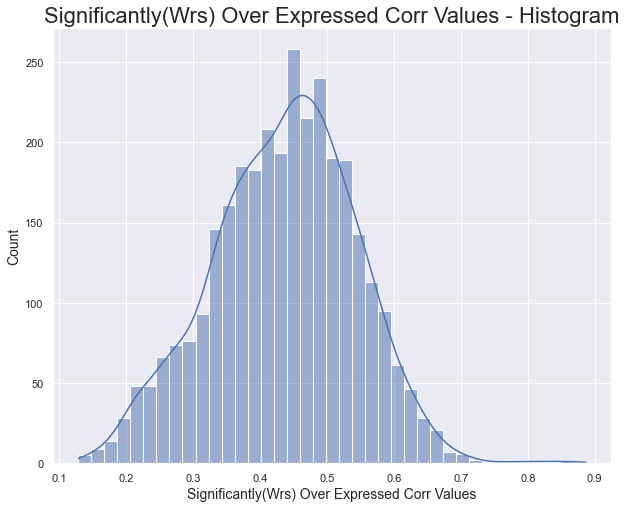

In [26]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10, 8))
sns.histplot(over_expressed_corr_values, kde=True)

plt.ylabel("Count", fontsize=14)
plt.xlabel("significantly(WRS) over expressed corr values".title(), fontsize=14)
plt.title("significantly(WRS) over expressed corr values - Histogram".title(), fontsize=22)

plt.show()

In [27]:
print(f"The mean of the correlation coefficient between the pairs of 80 over-expressed genes is {np.mean(over_expressed_corr_values):.3f}.\n"
"While we expected it to be 0.\n")

The mean of the correlation coefficient between the pairs of 80 over-expressed genes is 0.436.
While we expected it to be 0.



4) What can you report about co-expression of genes in D (co- expression is inferred from the correlation of the expression levels of genes, across a set of samples)?


From the data aquired thus far, we can say the over-expressed genes in D are positively correlated. Furthermore, we can say that the correlation values distribute normally with a mean at around 0.44. <br>
If we'd look at the heatmap above, we can hypothesize that there are four different cases, that correlate in two different ways. The over-expressed <> over-expressed genes and the under-expressed <> under-expressed genes which have high positive correlation (red) and the cross genes (over-expressed <> under-expressed and under-expressed <> over-expressed) which are strongly negatively correlated (blue).
<br>
To verify, we'll plot the 2nd group - the under-expressed <> under-expressed case:

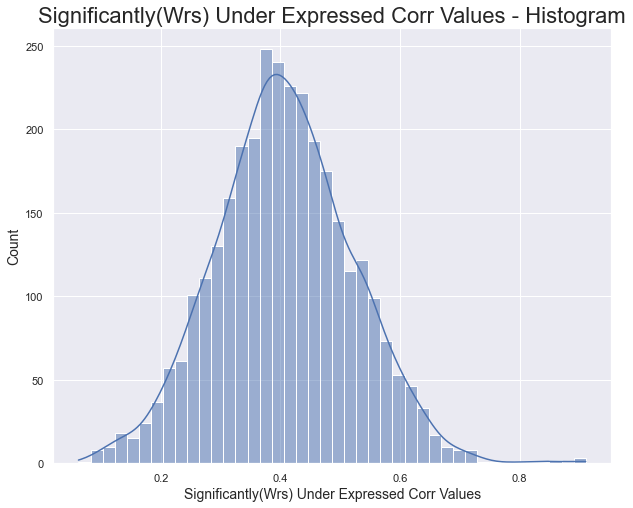

In [28]:
under_expressed_kendell_df = df[D[D.expressed == "under"].gene]

under_expressed_corr = under_expressed_kendell_df.corr(method="kendall")

under_expressed_corr_values = []
cols = list(under_expressed_corr.columns)

for i, (index, row) in enumerate(start=0, iterable=under_expressed_corr.iterrows()):
    under_expressed_corr_values.extend(row[i + 1: ])  # for each row, append all values to the right of the correlation with itself

sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10, 8))
sns.histplot(under_expressed_corr_values, kde=True)

plt.ylabel("Count", fontsize=14)
plt.xlabel("significantly(WRS) under expressed corr values".title(), fontsize=14)
plt.title("significantly(WRS) under expressed corr values - Histogram".title(), fontsize=22)

plt.show()

Indeed, as we suspected, there is a positive correlation between genes expression levels that are under-expressed.

Let's continue and check all of the genes in D:

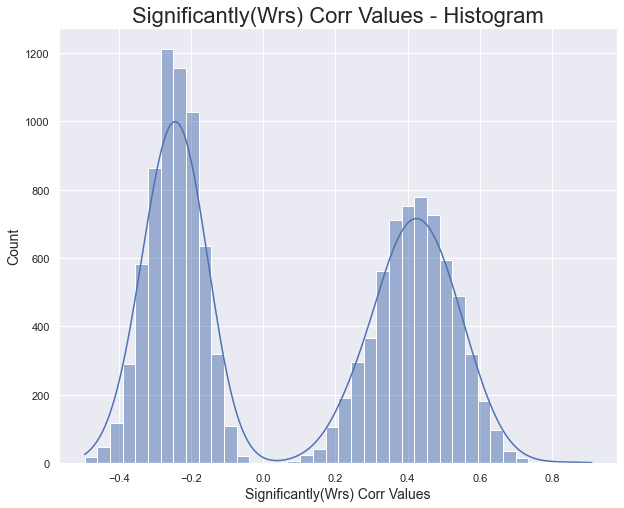

In [29]:
expressed_kendell_df = df[D.gene]

expressed_corr = expressed_kendell_df.corr(method="kendall")

expressed_corr_values = []
cols = list(expressed_corr.columns)

for i, (index, row) in enumerate(start=0, iterable=expressed_corr.iterrows()):
    expressed_corr_values.extend(row[i + 1: ])  # for each row, append all values to the right of the correlation with itself

expressed_corr_values = np.array(expressed_corr_values)

sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10, 8))
sns.histplot(expressed_corr_values, kde=True, bins=40)

plt.ylabel("Count", fontsize=14)
plt.xlabel("significantly(WRS) corr values".title(), fontsize=14)
plt.title("significantly(WRS) corr values - Histogram".title(), fontsize=22)

plt.show()

Again, it seems like there are two types of correlations - the first, a positive that that we have shown to be same-group correlations (over <> over and under <> under). The second, a negatively correlated group, which is constructed by whatever is left - the cross group (over <> under and under <> over). <br> Both types are consistent with our hypothesis and the heatmap presneted above.

5. What can you say about how many co-expressed pairs we would observe (in the entire dataset) at FDR=0.05? Explain your answer.

If we were to compute theoretically the num of co-expressed pairs we woule get, we'd use the following formula and compute as follows:
According to the formula in class: $$ FDR(p) = \frac{pN}{O(p)} $$


In [30]:
fdr_threshold = 0.05
p_val_threshold = 0.025
N = math.comb(num_genes, 2)
print(f'The number of expected co-expressed pairs that we would observe is {p_val_threshold * N / fdr_threshold:.3f}')

The number of expected co-expressed pairs that we would observe is 746040939.000


However, if we would try to compute it empirically it would be very difficult to compute it over the entire dataset, so we'd limit ourselves to the genes found in D. We'll compute it as follows:

In [31]:
df_all = kendell_df.corr(method='kendall')
df_all

Class,208869_s_at,216248_s_at,204622_x_at,244054_at,203887_s_at,203888_at,217202_s_at,203574_at,241279_at,240103_at,...,223588_at,221081_s_at,235310_at,230428_at,222108_at,235779_at,242874_at,1565882_at,224879_at,227626_at
Class,,,,,,,,,,,,,,,,,,,,,
208869_s_at,1.000000,0.664399,0.617811,0.433519,0.419913,0.408369,0.475984,0.584003,0.489177,0.457019,...,-0.345702,-0.217069,-0.285920,-0.255824,-0.234385,-0.281856,-0.346526,-0.377036,-0.216656,-0.323026
216248_s_at,0.664399,1.000000,0.851165,0.448361,0.386106,0.386931,0.466089,0.555968,0.484230,0.450423,...,-0.415791,-0.326737,-0.335395,-0.289631,-0.268192,-0.349485,-0.416615,-0.401773,-0.238095,-0.417852
204622_x_at,0.617811,0.851165,1.000000,0.457019,0.373325,0.392290,0.442589,0.554731,0.450010,0.400536,...,-0.400536,-0.319728,-0.324263,-0.280148,-0.267780,-0.354845,-0.411255,-0.404659,-0.261596,-0.400124
244054_at,0.433519,0.448361,0.457019,1.000000,0.522160,0.531231,0.534529,0.562564,0.460317,0.576582,...,-0.226139,-0.281385,-0.244692,-0.297877,-0.313544,-0.308247,-0.337456,-0.261596,-0.327974,-0.340342
203887_s_at,0.419913,0.386106,0.373325,0.522160,1.000000,0.783137,0.495362,0.476397,0.468975,0.466502,...,-0.178726,-0.263657,-0.204700,-0.244692,-0.233972,-0.219588,-0.307359,-0.211709,-0.229437,-0.232736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235779_at,-0.281856,-0.349485,-0.354845,-0.308247,-0.219588,-0.260000,-0.194021,-0.171753,-0.151134,-0.245155,...,0.359794,0.437732,0.411340,0.341237,0.371340,1.000000,0.234021,0.259175,0.275670,0.459175
242874_at,-0.346526,-0.416615,-0.411255,-0.337456,-0.307359,-0.282622,-0.274376,-0.302412,-0.292517,-0.304886,...,0.197691,0.287570,0.137085,0.266131,0.195217,0.234021,1.000000,0.419501,0.252525,0.319316
1565882_at,-0.377036,-0.401773,-0.404659,-0.261596,-0.211709,-0.195217,-0.255411,-0.315605,-0.305710,-0.231499,...,0.320552,0.226551,0.322614,0.283447,0.217481,0.259175,0.419501,1.000000,0.151927,0.385281


In [32]:
all_co_expressed_p_vals = []
for i in range(len(df_all.columns)):
    col_1 = df_all.columns[i]
    for j in range(i+1, len(df_all.columns)):
        col_2 = df_all.columns[j]
        if df_all.loc[col_1][col_2] > 0:
            all_co_expressed_p_vals.append(st.kendalltau(kendell_df[col_1], kendell_df[col_2])[1])

In [33]:
def compute_fdr(p_vals, fdr_threshold):
    sorted_p_vals = sorted(p_vals)
    res = None
    for i, p_val in enumerate(sorted_p_vals):
        num_to_res = i + 1
        fdr = p_val * len(sorted_p_vals) / num_to_res

        if not res:
            res = num_to_res
        if fdr <= fdr_threshold and num_to_res > res:
            res = num_to_res

    print (f'For FDR threshold of {fdr_threshold}, there are {res} co-expressed pairs we would observe in the given DS.')



In [34]:
compute_fdr(all_co_expressed_p_vals, fdr_threshold=0.05)

For FDR threshold of 0.05, there are 6291 co-expressed pairs we would observe in the given DS.


6) What would have been advantages and disadvantages of computing co-expression for all genes in the study rather than only for genes in D?


If we were to compute all correlations and not only the ones that were found in D, we would have a better chance to find other interesting correlations that are not limited to the relationship of over or under expressed genes. Meaning, by limited ourselves to the top 80 over and under expressed genes, we may have missed out on interesting correlations that would have been found otherwise, and that's this approach's main advantage.

However, such approach has a major disadvantage which is the false positives rate. The more comparisons we make and the more hypothesis we test, we'd get more and more false positives, which can either lead us to a false conclusion or simply blurr or distract us from the "right" conclusion. In addition, as we compute way more correlations, the running time increases by a lot.

### e. Plots and Conclusions of the DE and correlation analysis

1) Construct the DE overabundance plots (blue and green lines as shown in class) for M vs H overexpression (higher expression levels in M) using WRS and t-test using the results you had computed in Section 3c. <br>

In [35]:
def DE_overabundance_plot(genes_and_p_vals, title):
    p_vals = np.linspace(0, 1, num_genes//1)
    lent = len(genes_and_p_vals)

    counts_list = []
    expected_counts_list = []
    for p_val in p_vals:
        count_lower_than_current_p_val = len([item[1] for item in genes_and_p_vals if item[1] <= p_val]) 
        counts_list.append(count_lower_than_current_p_val)

        excpected_lower_than_p_val = p_val * lent
        expected_counts_list.append(excpected_lower_than_p_val)

    plt.figure(figsize=(15, 12))
    sns.scatterplot(x=p_vals, y=counts_list)
    sns.scatterplot(x=p_vals, y=expected_counts_list)

    plt.title(title, fontsize=25)
    plt.xlabel("p-value(i)", fontsize=20)
    plt.ylabel("i", fontsize=20)
    plt.show()

    return expected_counts_list, counts_list

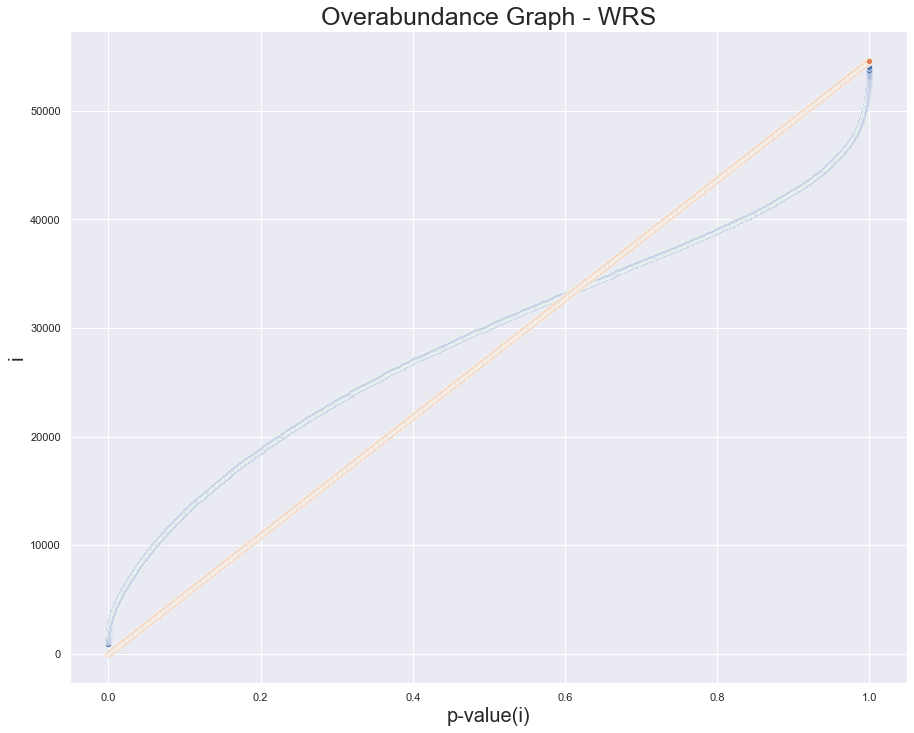

In [36]:
wrs_expected_counts_list, wrs_counts_list = DE_overabundance_plot(wrs_p_vals_m_over_h, "Overabundance Graph - WRS")

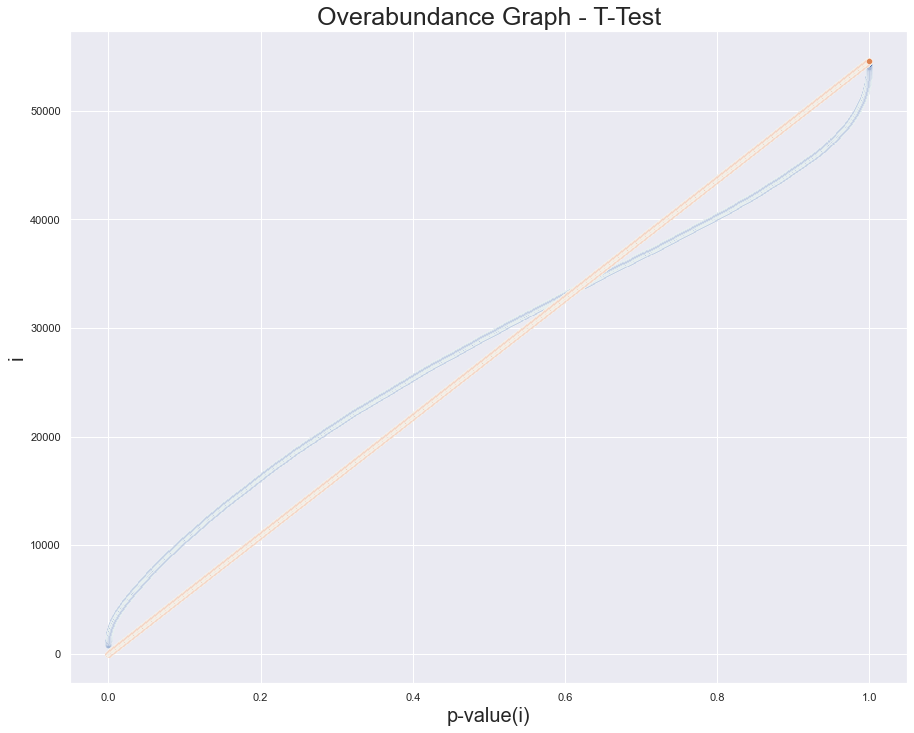

In [37]:
t_expected_counts_list, t_counts_list = DE_overabundance_plot(t_p_vals_m_over_h, "overabundance graph - t-Test".title())

State, for each comparison, the number of genes, k, at which
we observe: <br>
a) FDR = 0.05 <br>
b) FDR = 0.01 <br>
c) FDR = 0.005 <br>
If these events are not observed at any k, then make that
statement.

K is simply the number of genes (in the plot it's i), in which we can report the requested FDR. Let's check:

In [38]:
wrs_p_vals_m_over_h

[('1007_s_at', 0.8465591737060973),
 ('1053_at', 0.14056698076532187),
 ('117_at', 8.929379986038556e-06),
 ('121_at', 0.26439021667996515),
 ('1255_g_at', 0.15015140719614034),
 ('1294_at', 0.9534872939732111),
 ('1316_at', 0.998962765677087),
 ('1320_at', 0.04583546554456134),
 ('1405_i_at', 0.9982407917062629),
 ('1431_at', 0.9998839456860327),
 ('1438_at', 0.20247128993282465),
 ('1487_at', 0.14371454869937017),
 ('1494_f_at', 0.12266689096013988),
 ('1552256_a_at', 0.21045821717750796),
 ('1552257_a_at', 0.9034954505620201),
 ('1552258_at', 0.38574001510289546),
 ('1552261_at', 0.5639400948891793),
 ('1552263_at', 0.7216927529327108),
 ('1552264_a_at', 0.5556584860394391),
 ('1552266_at', 0.39514093758844165),
 ('1552269_at', 0.15427058353688433),
 ('1552271_at', 0.03716081872867343),
 ('1552272_a_at', 0.5735664100805911),
 ('1552274_at', 0.42232105829818795),
 ('1552275_s_at', 0.36582610117618736),
 ('1552276_a_at', 0.009348689673408022),
 ('1552277_a_at', 0.9945746305043549),
 (

In [39]:
compute_fdr([p[1] for p in wrs_p_vals_m_over_h], fdr_threshold= 0.05)
compute_fdr([p[1] for p in wrs_p_vals_m_over_h], fdr_threshold= 0.01)
compute_fdr([p[1] for p in wrs_p_vals_m_over_h], fdr_threshold= 0.005)

For FDR threshold of 0.05, there are 2808 co-expressed pairs we would observe in the given DS.
For FDR threshold of 0.01, there are 1601 co-expressed pairs we would observe in the given DS.
For FDR threshold of 0.005, there are 1323 co-expressed pairs we would observe in the given DS.


In [40]:
compute_fdr([p[1] for p in t_p_vals_m_over_h], fdr_threshold= 0.05)
compute_fdr([p[1] for p in t_p_vals_m_over_h], fdr_threshold= 0.01)
compute_fdr([p[1] for p in t_p_vals_m_over_h], fdr_threshold= 0.005)

For FDR threshold of 0.05, there are 2104 co-expressed pairs we would observe in the given DS.
For FDR threshold of 0.01, there are 1305 co-expressed pairs we would observe in the given DS.
For FDR threshold of 0.005, there are 1104 co-expressed pairs we would observe in the given DS.


2) Select any 3 differentially expressed genes, from D (which was defined in 3d), and produce a graphical representation of their expression patterns that demonstrates the observed DE.

In [41]:
sampled_genes = list(D.sample(3).gene)
D1 = df[sampled_genes + ["class"]]
print(D1.shape)  # 99 samples, 3 genes, 1 col for class
D1.head()

(99, 4)


Class,217482_at,210146_x_at,235536_at,class
ID_REF,,,,
GSM1620819,10.825514,6.395305,6.683342,H
GSM1620820,10.369813,6.603563,5.800307,H
GSM1620821,9.743438,3.597230,7.192863,H
GSM1620822,10.496512,4.572558,6.216139,H
GSM1620823,10.864731,5.235646,6.580450,H


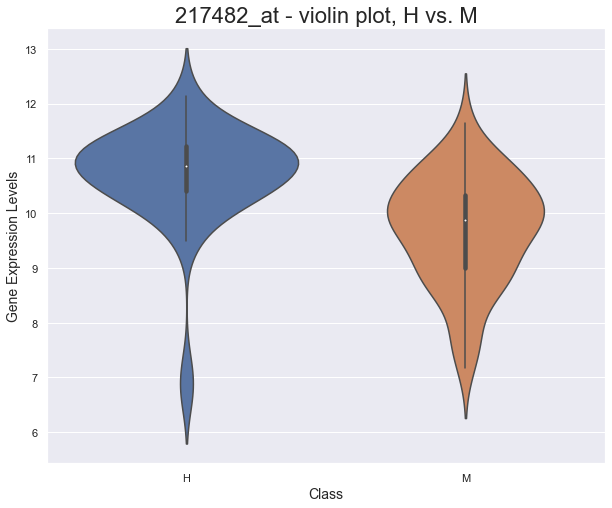

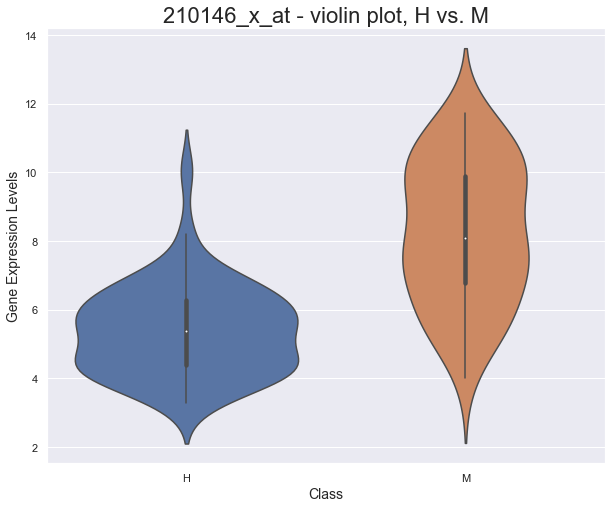

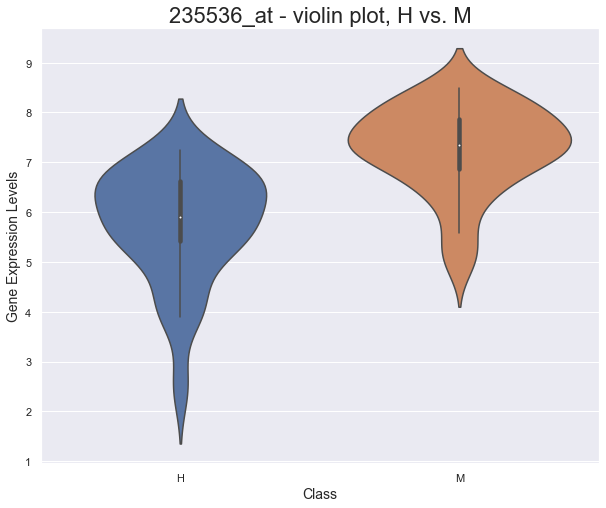

In [42]:
for gene in sampled_genes:
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.violinplot(x="class",
                    y=gene,
                    data=D1)

    plt.ylabel("gene expression levels".title(), fontsize=14)
    plt.xlabel("Class", fontsize=14)
    plt.title(f"{gene} - violin plot, H vs. M", fontsize=22)

    plt.show()

it seems clearly via the violin plots, that this genes expression levels behave differently for classes H and M.
We can also look at kde plots:

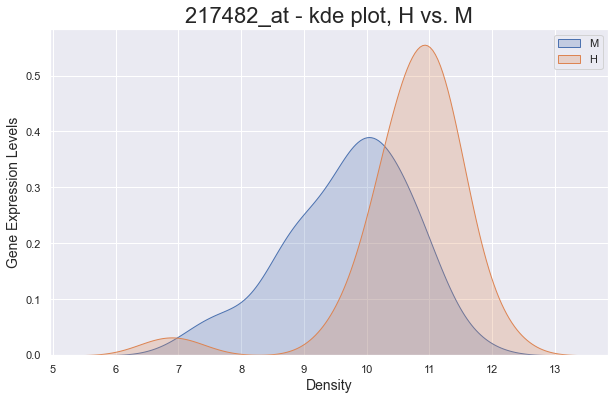

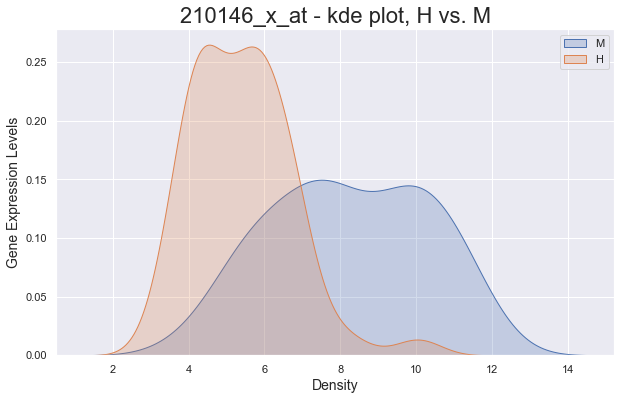

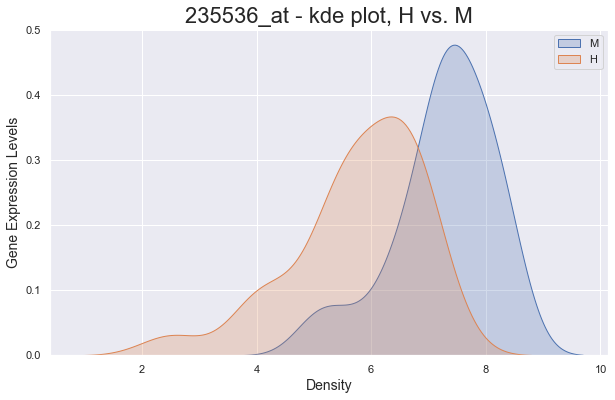

In [43]:
for gene in sampled_genes:
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.kdeplot(D1[D1["class"] == "M"][gene], shade=True, label='M')
    sns.kdeplot(D1[D1["class"] == "H"][gene], shade=True, label='H')

    plt.ylabel("gene expression levels".title(), fontsize=14)
    plt.xlabel("Density", fontsize=14)
    plt.title(f"{gene} - kde plot, H vs. M", fontsize=22)
    plt.legend()

    plt.show()

3) Heatmap
Draw a heatmap representation of the expression values of the genes in D (from 3d), across the entire cohort (all samples). Order the genes and the samples to produce the maximal visual effect.

In [44]:
D_gene_matrix = df[["class"] + list(D.gene)].sort_values(by="class")
D_gene_matrix.drop("class", axis=1, inplace=True)
D_gene_matrix

Class,208869_s_at,216248_s_at,204622_x_at,244054_at,203887_s_at,203888_at,217202_s_at,203574_at,241279_at,240103_at,...,223588_at,221081_s_at,235310_at,230428_at,222108_at,235779_at,242874_at,1565882_at,224879_at,227626_at
ID_REF,,,,,,,,,,,,,,,,,,,,,
GSM1620819,8.070220,5.802974,6.896882,6.711893,6.038182,5.780497,6.781219,9.023625,6.667995,7.770745,...,6.203788,10.616645,6.590359,8.718653,8.120315,7.822442,9.455573,6.969992,9.591532,8.858780
GSM1620871,8.335727,3.532942,5.955067,7.781316,6.862840,7.033810,6.303537,6.563106,4.804661,5.781806,...,4.489424,10.848825,7.855175,8.670997,8.624589,8.297886,9.979932,8.009184,9.511296,9.568832
GSM1620870,8.047862,4.017986,6.229837,6.949568,4.407656,3.740844,6.492431,5.508488,6.328510,3.603050,...,4.689093,10.944627,6.579395,8.045056,7.774755,8.249378,9.859474,6.629139,9.717050,10.106283
GSM1620869,7.877989,5.887662,6.293560,6.665847,5.167137,5.344064,6.408443,6.727558,5.919667,7.036228,...,6.263008,10.205588,7.186269,8.263635,7.469209,7.729706,9.546533,8.323380,9.772214,9.441652
GSM1620867,7.783243,5.500468,6.707403,6.817896,4.973400,4.590734,6.577934,7.274726,3.663484,5.634189,...,5.879191,10.943544,8.357936,7.236458,7.965401,7.663694,8.342528,4.993061,10.229350,8.993523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1620881,10.669638,11.385330,12.106938,10.626864,10.668353,10.483667,10.632809,11.444107,9.100989,10.477857,...,3.510720,7.194711,5.687830,6.656632,6.829832,5.584247,7.476776,5.155193,9.145754,3.620010
GSM1620882,9.470576,9.176896,10.085351,9.792534,10.000131,10.150043,8.057794,10.169691,6.685792,10.359783,...,3.047912,8.454015,5.546301,6.355525,4.185539,5.917357,7.221268,4.916064,9.352292,7.360581
GSM1620883,9.302340,9.711687,10.086363,10.023325,8.803001,9.163310,7.844635,11.741422,7.457922,11.463712,...,4.238610,6.019033,5.133751,6.432877,5.992220,5.759961,9.992973,7.510214,7.051753,6.141448


Text(111.5, 0.5, 'Genes')

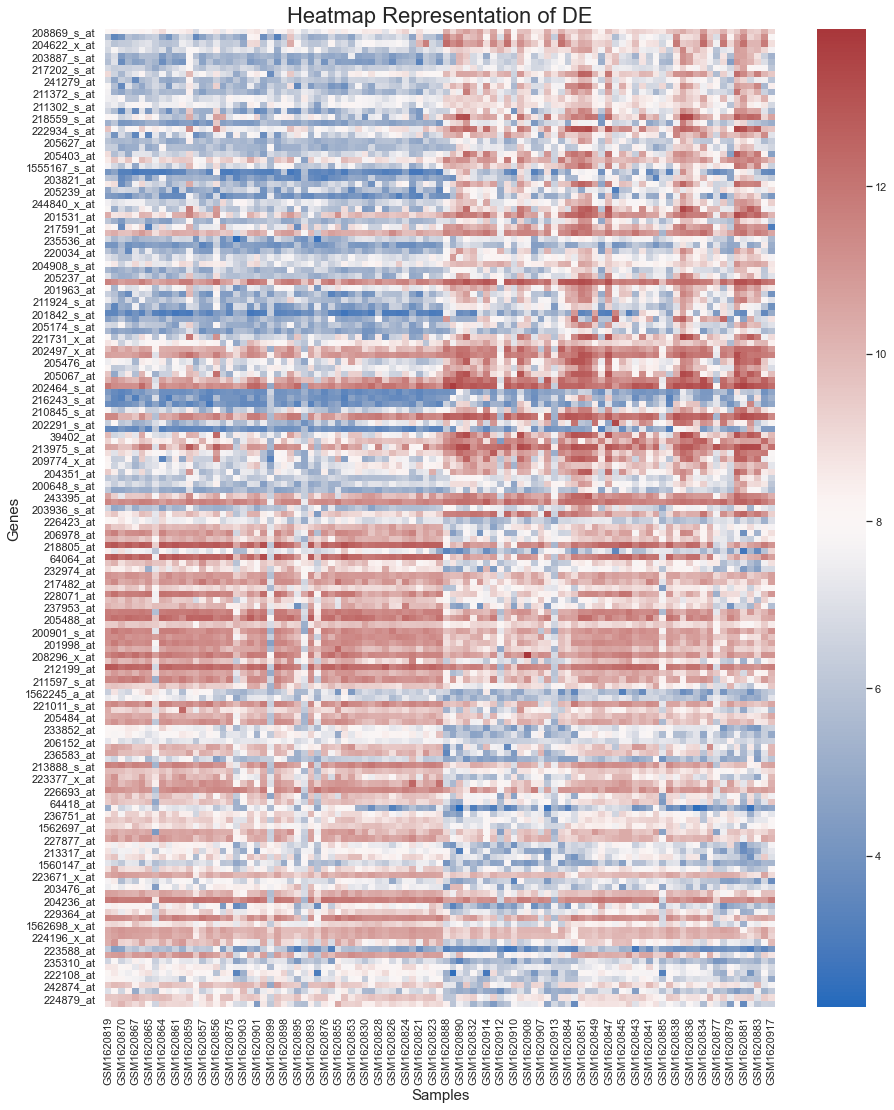

In [45]:
plt.figure(figsize = (15, 18))

sns.heatmap(D_gene_matrix.T, cmap="vlag")

plt.title('Heatmap Representation of DE', fontsize=22)
plt.xlabel('Samples', fontsize=15)
plt.ylabel('Genes', fontsize=15)